In [143]:
# Import neccessary libries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 283)

from sklearn import preprocessing
import matplotlib.pyplot as plt # For ploting 
import seaborn as sns
plt.rc("font", size=14)

from sklearn.utils import shuffle

In [144]:
# Read in dataset
df = pd.read_csv('merged_file_f.csv')

In [145]:
	t_column = [c for c in df.columns if c.startswith('t_')]
	f_columns = [c for c in df.columns if c.startswith('f_')]

	#print (f_columns)

	print('Dataset has {} rows and {} feature columns'.format(df.shape[0], len(f_columns)))
	import random
	random.seed(8)
    
	df = shuffle(df)
	x = df[f_columns]
	y = df[t_column]

Dataset has 388 rows and 274 feature columns


In [146]:
# Display a couple datas 
df.head()

,Unnamed: 0,Unnamed: 0.1,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,EXTRACTED_LENGTH,f_II__abs_energy,f_II__absolute_sum_of_changes,f_II__agg_autocorrelation__f_agg_mean__maxlag_40,f_II__agg_autocorrelation__f_agg_median__maxlag_40,f_II__agg_autocorrelation__f_agg_var__maxlag_40,f_II__ar_coefficient__k_10__coeff_0,f_II__ar_coefficient__k_10__coeff_1,f_II__ar_coefficient__k_10__coeff_2,f_II__ar_coefficient__k_10__coeff_3,f_II__ar_coefficient__k_10__coeff_4,f_II__autocorrelation__lag_0,f_II__autocorrelation__lag_1,f_II__autocorrelation__lag_2,f_II__autocorrelation__lag_3,f_II__autocorrelation__lag_4,f_II__autocorrelation__lag_5,f_II__autocorrelation__lag_6,f_II__autocorrelation__lag_7,f_II__autocorrelation__lag_8,f_II__autocorrelation__lag_9,f_II__binned_entropy__max_bins_10,f_II__count_above_mean,f_II__count_below_mean,f_II__fft_aggregated__aggtype_centroid,f_II__fft_aggregated__aggtype_kurtosis,f_II__fft_aggregated__aggtype_skew,f_II__fft_aggregated__aggtype_variance,f_II__first_location_of_maximum,f_II__first_location_of_minimum,f_II__kurtosis,f_II__large_standard_deviation__r_0.05,f_II__large_standard_deviation__r_0.1,f_II__large_standard_deviation__r_0.15000000000000002,f_II__large_standard_deviation__r_0.2,f_II__large_standard_deviation__r_0.25,f_II__large_standard_deviation__r_0.30000000000000004,f_II__large_standard_deviation__r_0.35000000000000003,f_II__large_standard_deviation__r_0.4,f_II__large_standard_deviation__r_0.45,f_II__large_standard_deviation__r_0.5,f_II__large_standard_deviation__r_0.55,f_II__large_standard_deviation__r_0.6000000000000001,f_II__large_standard_deviation__r_0.65,f_II__large_standard_deviation__r_0.7000000000000001,f_II__large_standard_deviation__r_0.75,f_II__large_standard_deviation__r_0.8,f_II__large_standard_deviation__r_0.8500000000000001,f_II__large_standard_deviation__r_0.9,f_II__large_standard_deviation__r_0.9500000000000001,f_II__length,f_II__linear_trend__attr_intercept,f_II__linear_trend__attr_pvalue,f_II__linear_trend__attr_rvalue,f_II__linear_trend__attr_slope,f_II__linear_trend__attr_stderr,f_II__longest_strike_above_mean,f_II__longest_strike_below_mean,f_II__max_langevin_fixed_point__m_3__r_30,f_II__maximum,f_II__mean,f_II__median,f_II__minimum,f_II__quantile__q_0.1,f_II__quantile__q_0.2,f_II__quantile__q_0.3,f_II__quantile__q_0.4,f_II__quantile__q_0.6,f_II__quantile__q_0.7,f_II__quantile__q_0.8,f_II__quantile__q_0.9,f_II__skewness,f_II__standard_deviation,f_II__variance,f_PLETH__abs_energy,f_PLETH__absolute_sum_of_changes,f_PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_median__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_var__maxlag_40,f_PLETH__ar_coefficient__k_10__coeff_0,f_PLETH__ar_coefficient__k_10__coeff_1,f_PLETH__ar_coefficient__k_10__coeff_2,f_PLETH__ar_coefficient__k_10__coeff_3,f_PLETH__ar_coefficient__k_10__coeff_4,f_PLETH__autocorrelation__lag_0,f_PLETH__autocorrelation__lag_1,f_PLETH__autocorrelation__lag_2,f_PLETH__autocorrelation__lag_3,f_PLETH__autocorrelation__lag_4,f_PLETH__autocorrelation__lag_5,f_PLETH__autocorrelation__lag_6,f_PLETH__autocorrelation__lag_7,f_PLETH__autocorrelation__lag_8,f_PLETH__autocorrelation__lag_9,f_PLETH__binned_entropy__max_bins_10,f_PLETH__count_above_mean,f_PLETH__count_below_mean,f_PLETH__fft_aggregated__aggtype_centroid,f_PLETH__fft_aggregated__aggtype_kurtosis,f_PLETH__fft_aggregated__aggtype_skew,f_PLETH__fft_aggregated__aggtype_variance,f_PLETH__first_location_of_maximum,f_PLETH__first_location_of_minimum,f_PLETH__kurtosis,f_PLETH__large_standard_deviation__r_0.05,f_PLETH__large_standard_deviation__r_0.1,f_PLETH__large_standard_deviation__r_0.15000000000000002,f_PLETH__large_standard_deviation__r_0.2,f_PLETH__large_standard_deviation__r_0.25,f_PLETH__large_standard_deviation__r_0.30000000000000004,f_PLETH__large_standard_deviation__r_0.35000000000000003,f_PLETH__large_standard_deviation__r_0.4,f_PLETH__large_standard_deviation__r_0.45,f_PLETH__large_standard_deviation__r_0.5,f_PLETH__large_sta

In [147]:
# Data Exploration
df['t_VOLUMNE_RESPONSIVENESS'].value_counts()

1    316
0     72
Name: t_VOLUMNE_RESPONSIVENESS, dtype: int64

In [148]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut, RandomizedSearchCV
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve

# Random Forest

In [149]:
# Split data into training and testing set
# 70% training and 30% testing 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state = 1215) 

#Create a leave-one-out cross-validation

loo = LeaveOneOut()
loo.get_n_splits(x)

x_loo = np.array(x)
y_loo = np.array(y)
for train_index, test_index in loo.split(x):
    x_train, x_test = x_loo[train_index], x_loo[test_index]
    y_train, y_test = y_loo[train_index], y_loo[test_index]
    
    
Decide not to use leave one out because found random search grid is easier to select best hyperparameters. 

In [150]:
paramdict = dict(criterion = ['gini','entropy'],
                 # Method of selecting samples for training each tree
                 bootstrap = [True, False],
                 # Number of trees in random forest
                 n_estimators = list(range(5,51,5)),
                 # Maximum number of levels in tree
                 max_depth = list(range(1,11)),
                 # Minimum number of samples required to split a node
                 min_samples_split = list(range(2,11)),
                 # Minimum number of samples required to be at a leaf node
                 min_samples_leaf = list(range(1,16)))
# print(paramdict)

rf = RandomForestClassifier(random_state=49)
rf_random = RandomizedSearchCV(rf, 
                               param_distributions= paramdict, 
                               random_state = 49,
                               cv = 10,
                               n_iter = 100, 
                               )

# fit the random search model
rf_random.fit(x_train, y_train.values.ravel())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

-----Best random search parameters-----
{'n_estimators': 35, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': False}

-----Classification Report-----
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        21
           1       0.86      0.97      0.91        96

    accuracy                           0.85       117
   macro avg       0.76      0.63      0.66       117
weighted avg       0.83      0.85      0.82       117


-----Feature Importance-----
f_MEANBP.MIN                              0.062095
f_SYSBP.MIN                               0.038269
f_SYSBP.COUNT                             0.036076
f_MEANBP.25.                              0.034939
f_SPO2.COUNT                              0.033814
f_MEANBP                                  0.030901
f_HEART_RATE.COUNT                        0.028550
f_DIASBP.MIN                              0.023552
f_MEANBP.MEAN                       

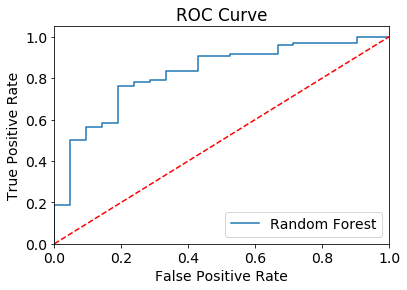

AUC: 0.82044
F1 Score: 0.91176


In [152]:
# Best random search parameters 
print("-----Best random search parameters-----")
print(rf_random.best_params_)
best_random = rf_random.best_estimator_

y_pred = best_random.predict(x_test)
y_prob = best_random.predict_proba(x_test)[:,1]

print("\n-----Classification Report-----")
print(classification_report(y_test.values.ravel(), y_pred))


print ("\n-----Feature Importance-----")
feature_imp = pd.Series(best_random.feature_importances_,index=x.columns).sort_values(ascending=False)
print(feature_imp.head(n=30))

print("\n-----Accuracy-----")
print(accuracy_score(y_test.values.ravel(), y_pred))

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print ( 'AUC: ' + str(round(metrics.auc(fpr,tpr),5)))
print('F1 Score: ' + str(round(f1_score(y_test.values.ravel(), y_pred),5)))

No handles with labels found to put in legend.


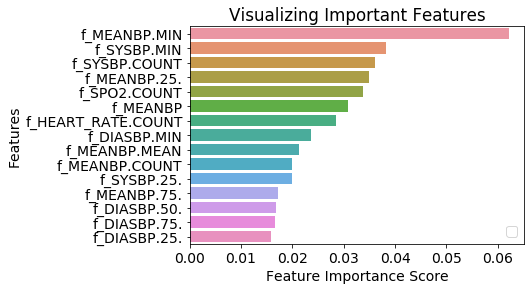

In [153]:
# Creating a bar plot for top 15 important features 
sns.barplot(x=feature_imp.head(n=15), y=feature_imp.head(n=15).index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGBoost

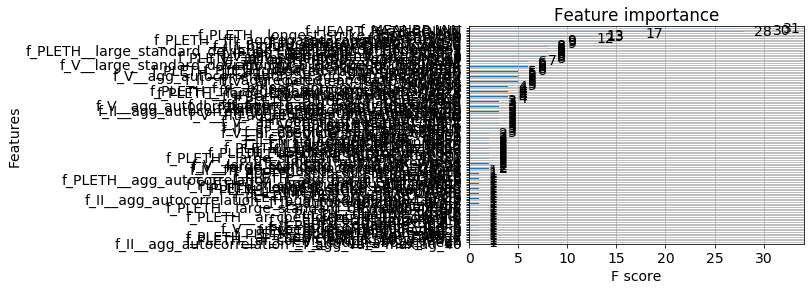

In [154]:
# Use XGBoost
def xgboost_train(X,Y):
    from xgboost import XGBClassifier
    from xgboost import plot_importance
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from sklearn.metrics import accuracy_score

    # splitting data in test train 
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=1215)
    
    # creating model 
    model = XGBClassifier(random_state = 49)
    
    # fitting model 
    model.fit(X_train,Y_train)
     
    #plot feature importance
    plot_importance(model)
    plt.show()

    return model, X_train, X_test, Y_train, Y_test

xg_rf, xg_x_train, xg_x_test, xg_y_train, xg_y_test = xgboost_train(x,y.values.ravel())


-----Classification Report-----
              precision    recall  f1-score   support

           0       0.50      0.29      0.36        21
           1       0.86      0.94      0.90        96

    accuracy                           0.82       117
   macro avg       0.68      0.61      0.63       117
weighted avg       0.79      0.82      0.80       117


-----Feature Importance-----
f_MEANBP.MIN                                 0.033797
f_II__absolute_sum_of_changes                0.033705
f_V__ar_coefficient__k_10__coeff_1           0.033401
f_HEART_RATE.COUNT                           0.027815
f_DIASBP.MEAN                                0.024616
f_V__large_standard_deviation__r_0.25        0.021282
f_V__large_standard_deviation__r_0.05        0.021114
f_DIASBP                                     0.018866
f_SYSBP                                      0.018809
f_PLETH__abs_energy                          0.018063
f_SYSBP.MIN                                  0.017972
f_PLETH__fft_agg

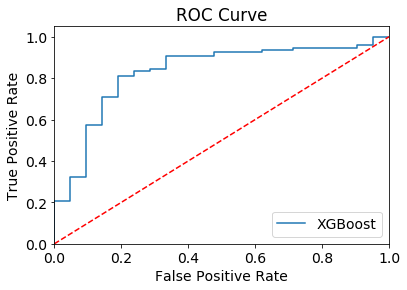

AUC: 0.82986
F1 Score: 0.91176


In [155]:
xg_y_pred = xg_rf.predict(xg_x_test)
xg_y_prob = xg_rf.predict_proba(xg_x_test)[:,1]

print("\n-----Classification Report-----")
print(classification_report(xg_y_test, xg_y_pred))


print ("\n-----Feature Importance-----")
xg_feature_imp = pd.Series(xg_rf.feature_importances_,index=x.columns).sort_values(ascending=False)
print(xg_feature_imp.head(n=25))

print("\n-----Accuracy-----")
print(accuracy_score(xg_y_test, xg_y_pred))

fpr, tpr, thresholds = roc_curve(xg_y_test, xg_y_prob)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print ( 'AUC: ' + str(round(metrics.auc(fpr,tpr),5)))
print('F1 Score: ' + str(round(f1_score(y_test.values.ravel(), y_pred),5)))